In [1]:
import os

import h5py
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import dill

from tqdm import tqdm

import util

In [2]:
dphi = ["d_phi_0", "d_phi_1", "d_phi_2", "d_phi_3", "d_phi_4", "d_phi_5L", "d_phi_6", "d_phi_6L", "d_phi_7"]
dalpha = ["d_alpha_2", "d_alpha_3", "d_alpha_4"]
dbeta = ["d_beta_2", "d_beta_3"]

dpi = dphi + dalpha + dbeta

In [3]:
dphi_labels = [
    "$" + s.replace("d_", "\\delta \\var").replace("5L", "{5L}").replace("6L", "{6L}") + "$" for s in dphi
]

dpi_labels = dphi_labels + [
    "$" + s.replace("d_", "\\delta \\") + "$" for s in (dalpha + dbeta)
]

# Load data

In [4]:
plot_dpi_data = util.load_dpi_resume_data(
    "/home/noah.wolfe/MA499_report_runs/real/pure-gr/GW150914/hybrid_pure-gr_GW150914/",
    "hybrid_pure-gr_GW150914_data0_1126259462-391_analysis_H1L1_dynesty",
    12
)

100%|██████████| 14/14 [00:47<00:00,  3.39s/it]


In [5]:
plot_dpi_overlap0_data = util.load_dpi_resume_data(
    "/home/noah.wolfe/MA499_report_runs/real/pure-gr/GW150914/hybrid_pure-gr_GW150914/",
    "hybrid_pure-gr_GW150914_data0_1126259462-391_analysis_H1L1_dynesty",
    12, extra_label="no-overlap"
)

100%|██████████| 14/14 [00:53<00:00,  3.79s/it]


In [6]:
tgr_pi_params = [
    "dphi_0", "dphi_1", "dphi_2", "dphi_3", "dphi_4", "dphi_5l", "dphi_6", "dphi_6l", "dphi_7", "dalpha_2", "dalpha_3", "dalpha_4", "dbeta_2", "dbeta_3"
]

tgr_data = []
with h5py.File("./PGen/GW150914_GWTC-1-TGR.hdf5", 'r') as datafile:
    for d in tgr_pi_params:
        tgr_data.append(
            datafile[f"{d}_IMRP_posterior"][d]
        )

# Plot some of the data

In [7]:
nwalkers = 250
stepmin = 800
stepmax = 1500
idxs = np.arange(stepmin * nwalkers,stepmax * nwalkers)

### FOR MCCORMICK

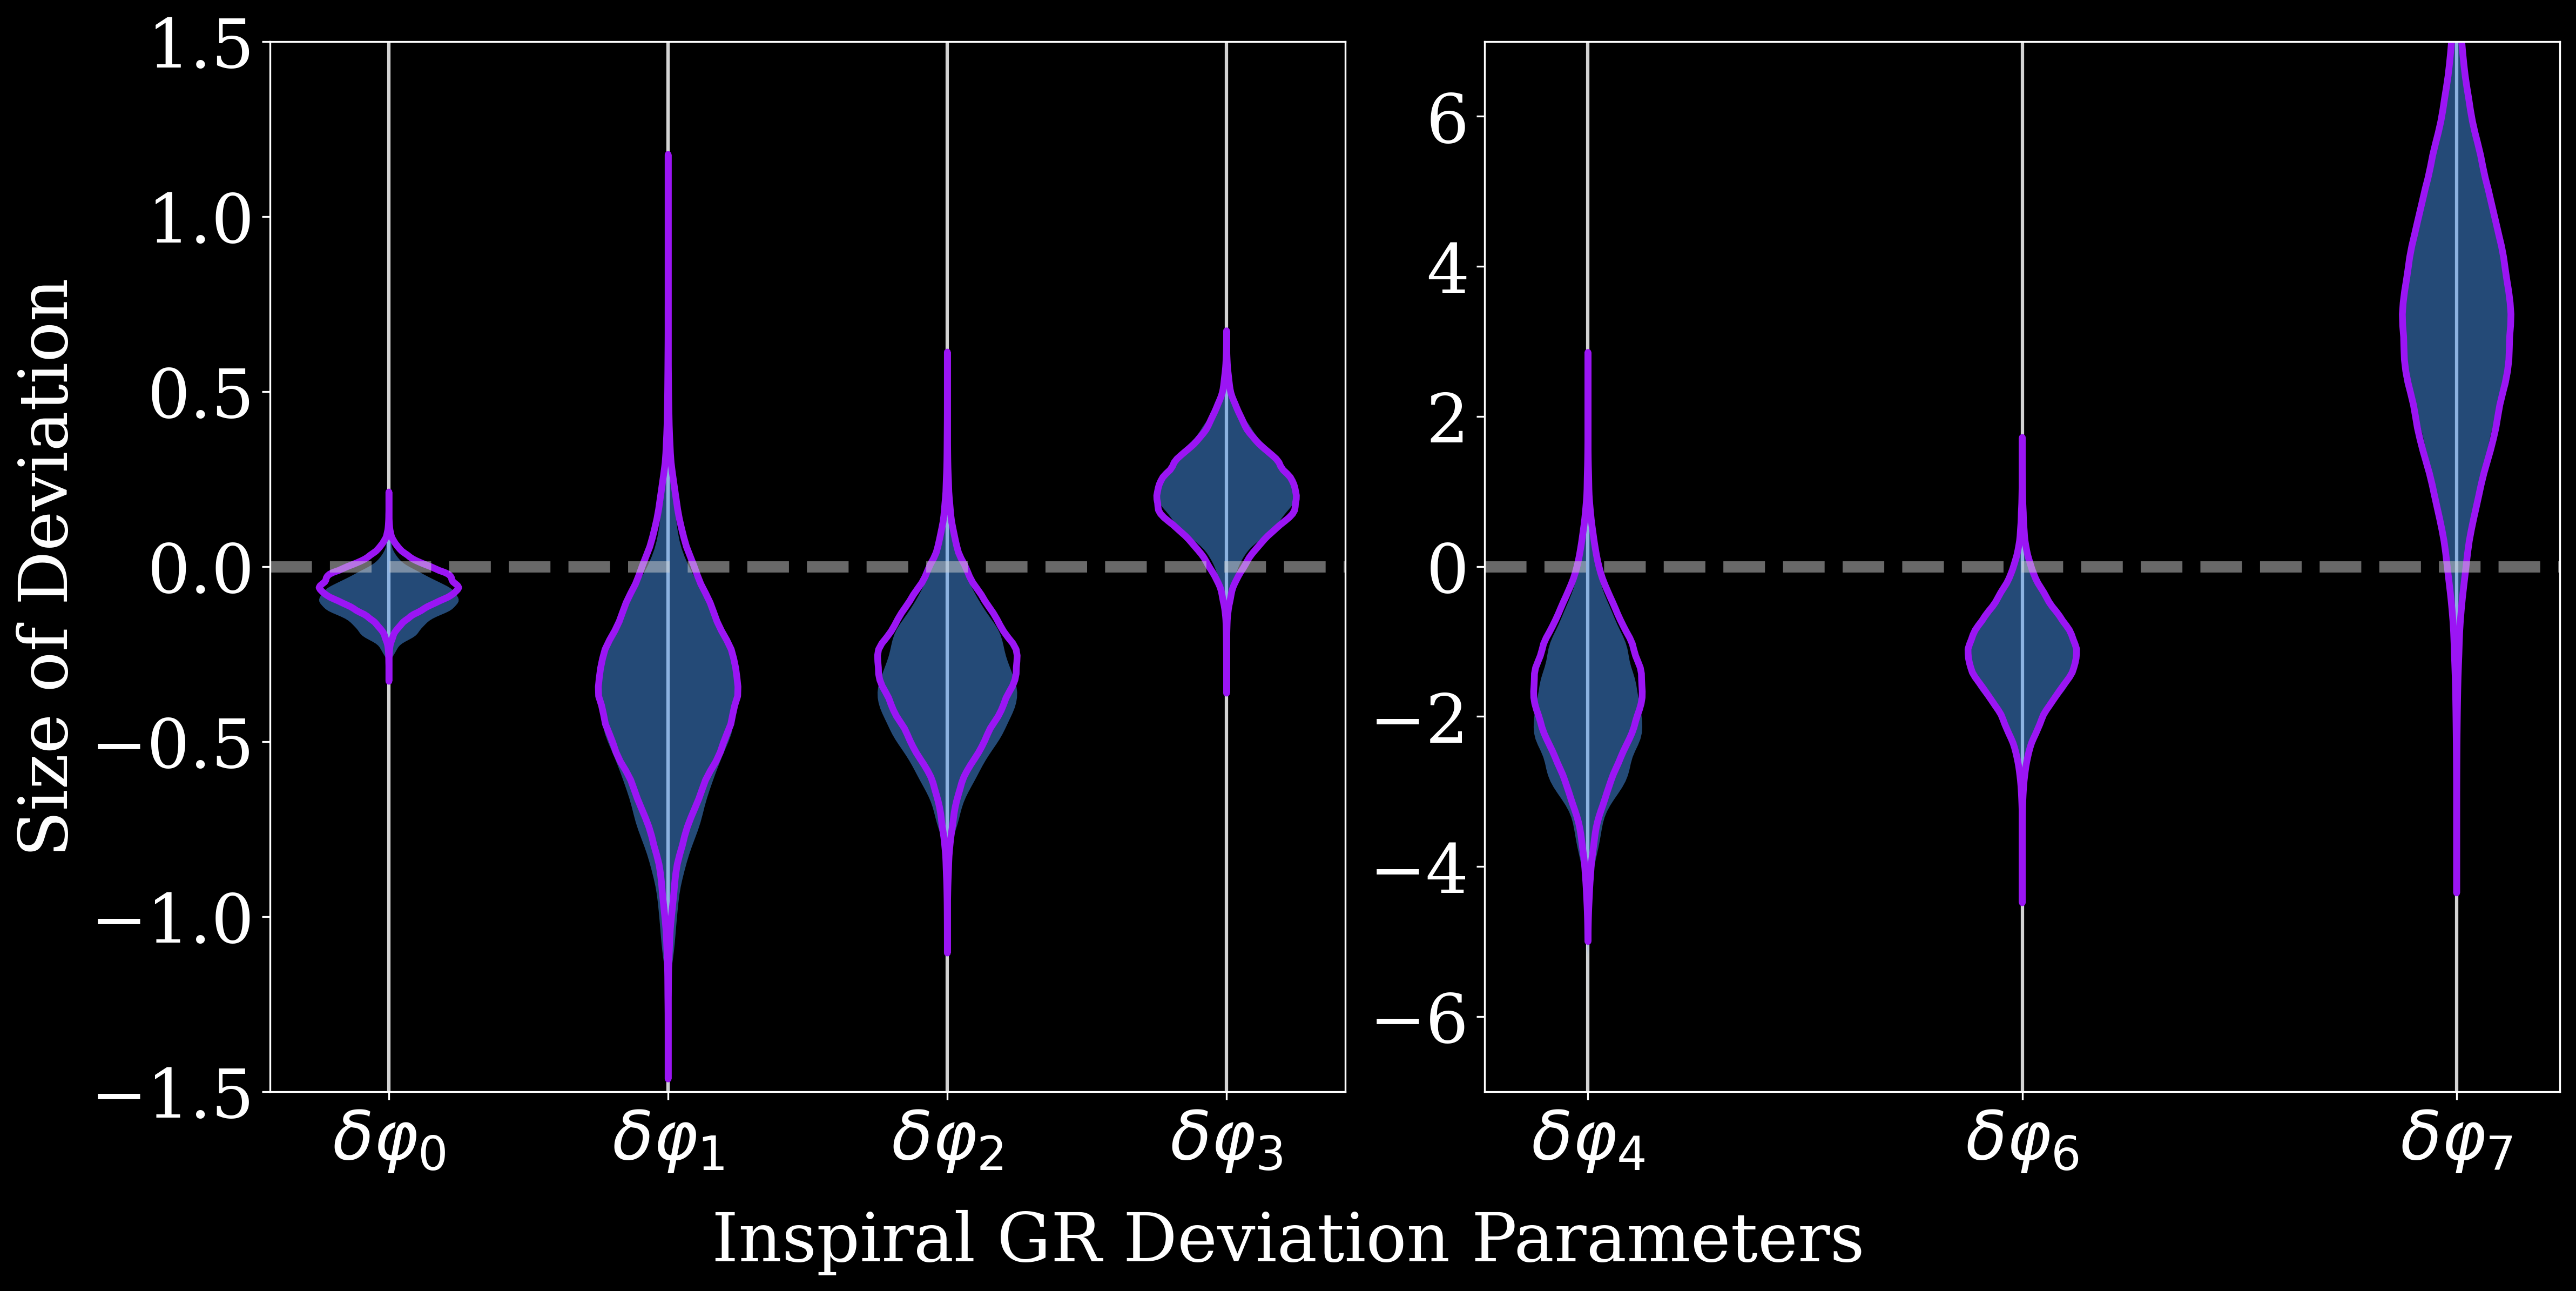

In [21]:
plt.style.use('dark_background')
plt.rcParams["font.family"] = "serif"


#chunks = [ [0,1], [2,3], [4,6], [8] ]
chunks = [ [0,1,2,3], [4,6,8] ]


fig2, axes2 = plt.subplots(figsize=(16,8), dpi=300, nrows=1,ncols=len(chunks))

hybrid_color = "#9B15F4" #"#3C096C" #"#62205f"
tgr_color    = "#4895ef" #"#0A9396" #"#ef8737"

for i,v in enumerate(chunks):
    axes2[i].axhline(y=0, color="#d3d3d3", linestyle="--", linewidth=5, alpha=0.5)

    for j in v:
        tgr_dists = axes2[i].violinplot( tgr_data[j], [j], showextrema=False)
        hybrid_dists = axes2[i].violinplot( list(plot_dpi_overlap0_data)[j][idxs], [j], showextrema=False)
        
        axes2[i].axvline(x=j,color="#d3d3d3",zorder=-1) # vertical line, in light gray, to guide the eye (to correlate dpi label to plot)

        #for partname in ('cquantiles',):
        #    hybrid_dists[partname].set_edgecolor(hybrid_color)
        #    tgr_dists[partname].set_edgecolor(tgr_color)
        
        for pc in hybrid_dists['bodies']:
            pc.set_facecolor("none")
            #pc.set_edgecolor('black')
            pc.set_edgecolor(hybrid_color)
            pc.set_linewidth(3)
            pc.set_linestyle("-")
            pc.set_alpha(1)
            pc.set_zorder(2)

        for pc in tgr_dists['bodies']:
            pc.set_facecolor(tgr_color)
            #pc.set_edgecolor('black')
            #pc.set_edgecolor(tgr_color)
            #pc.set_linewidth(3)
            pc.set_alpha(0.5)
            pc.set_zorder(2)
        
    axes2[i].set_xticks(v)
    axes2[i].set_xticklabels( [ dpi_labels[j] for j in v ] ) 
    
    axes2[i].tick_params(labelsize=30)
    
#hybrid_color = hybrid_dists["bodies"][0].get_facecolor().flatten()
#tgr_color = tgr_dists["bodies"][0].get_facecolor().flatten()

axes2[0].set_ylabel("Size of Deviation", fontsize=30)
fig2.supxlabel("Inspiral GR Deviation Parameters", fontsize=30)

#axes2[-1].legend(
#    [ mpl.lines.Line2D([],[],color=hybrid_color, linewidth=10), mpl.lines.Line2D([], [], color=tgr_color, linewidth=10) ],
#    [ "Hybrid", "Previous Work" ],
#    fontsize=30
#)

axes2[0].set_ylim(-1.5,1.5)
axes2[1].set_ylim(-7,7)
#axes2[1].set_ylim(-1,1)
#axes2[2].set_ylim(-7,7)

plt.tight_layout()


### NORMAL ONE

In [22]:
chunks = [ [0,1], [2,3], [4,5,6], [7,8], [9,10,11,12,13] ]

fig2, axes2 = plt.subplots(figsize=(12,8),dpi=80, nrows=1,ncols=len(chunks))

hybrid_color = "#3a0ca3" #"#3C096C" #"#62205f"
hybrid_overlap0_color = "#b5179e" #"#bb292c"
tgr_color    = "#4895ef" #"#0A9396" #"#ef8737"

for i,v in enumerate(chunks):
    axes2[i].axhline(y=0, color="#d3d3d3", linestyle="--", linewidth=5, alpha=0.3)

    for j in v:
        axes2[i].axvline(x=j,color="#d3d3d3",zorder=-1) # vertical line, in light gray, to guide the eye (to correlate dpi label to plot)

        tgr_dists = axes2[i].violinplot( tgr_data[j], [j], quantiles=[0.05, 0.95], showextrema=False)
        hybrid_overlap0_dists = axes2[i].violinplot( list(plot_dpi_overlap0_data)[j][idxs], [j], quantiles=[0.05, 0.95], showextrema=False )
        hybrid_dists = axes2[i].violinplot( list(plot_dpi_data)[j][idxs], [j], quantiles=[0.05, 0.95], showextrema=False )
        
        for partname in ('cquantiles',):
            hybrid_dists[partname].set_edgecolor(hybrid_color)
            hybrid_overlap0_dists[partname].set_edgecolor(hybrid_overlap0_color)
            tgr_dists[partname].set_edgecolor(tgr_color)
        
        for pc in hybrid_dists['bodies']:
            pc.set_facecolor("none")
            #pc.set_edgecolor('black')
            pc.set_edgecolor(hybrid_color)
            pc.set_linewidth(3)
            pc.set_alpha(1)
            
        for pc in hybrid_overlap0_dists['bodies']:
            pc.set_facecolor("none")
            #pc.set_edgecolor('black')
            pc.set_edgecolor(hybrid_overlap0_color)
            pc.set_linewidth(3)
            pc.set_alpha(1)

        for pc in tgr_dists['bodies']:
            pc.set_facecolor(tgr_color)
            #pc.set_edgecolor('black')
        
    axes2[i].set_xticks(v)
    axes2[i].set_xticklabels( dpi_labels[v[0]:v[-1]+1] ) 
    
    axes2[i].tick_params(labelsize=17.5)
    
#hybrid_color = hybrid_dists["bodies"][0].get_facecolor().flatten()
#tgr_color = tgr_dists["bodies"][0].get_facecolor().flatten()

axes2[-1].legend(
    [ mpl.patches.Patch(facecolor=hybrid_color), mpl.patches.Patch(facecolor=hybrid_overlap0_color), mpl.patches.Patch(facecolor=tgr_color) ],
    [ "Hybrid", "Hybrid (no overlap)", "TGR Paper" ],
    fontsize=15
)

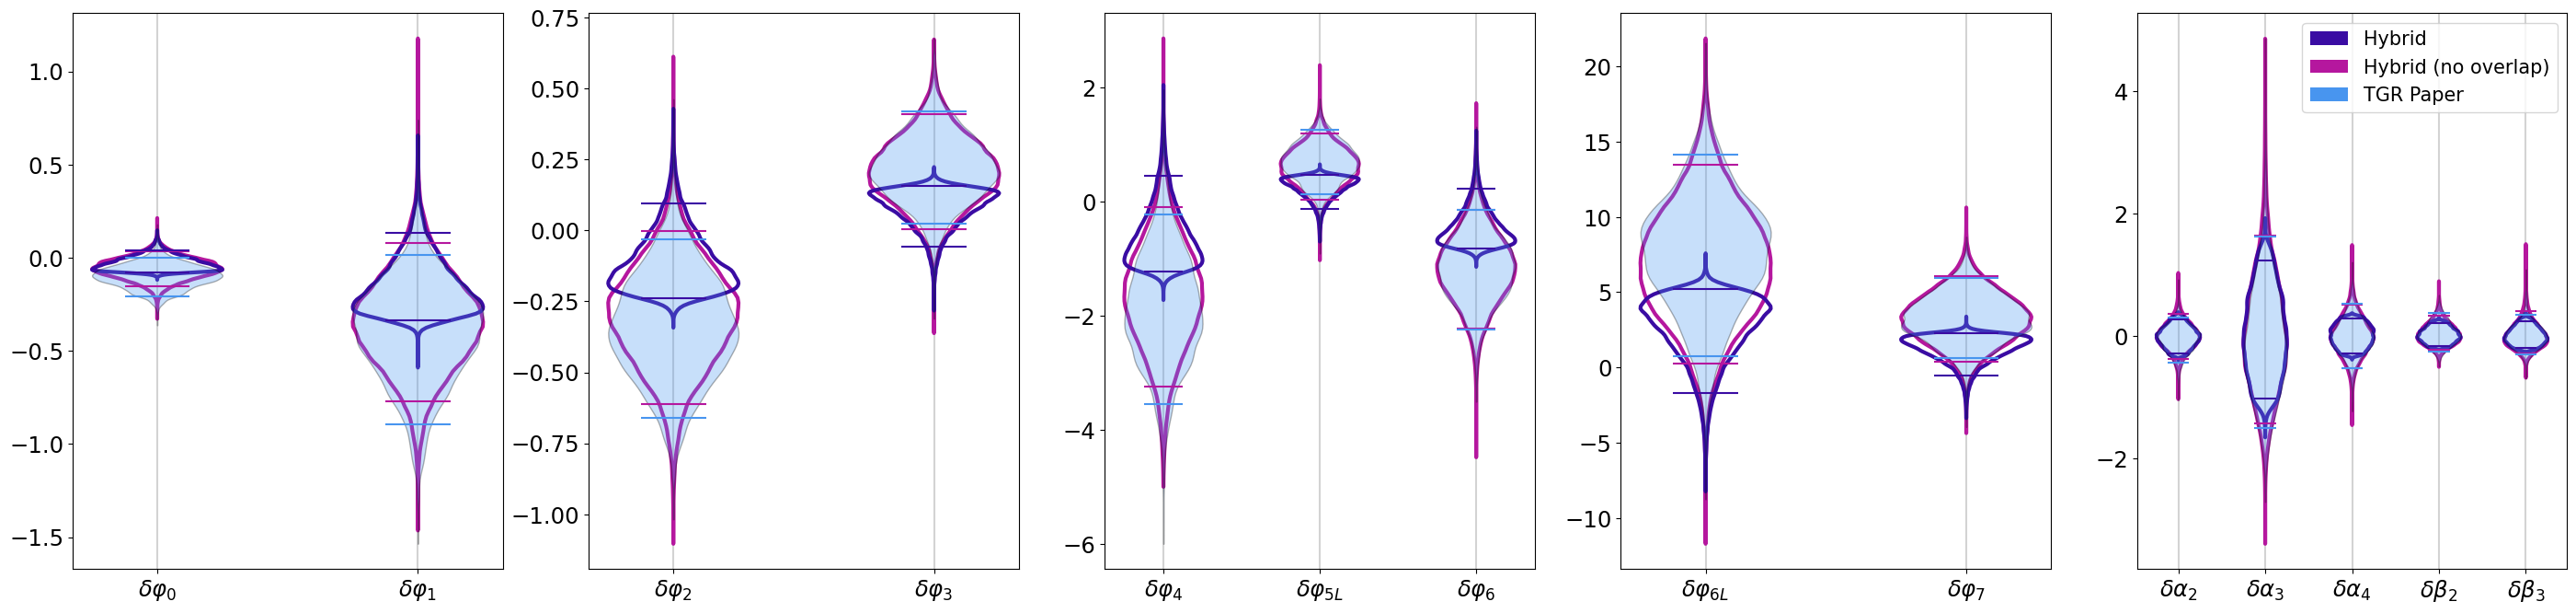

In [21]:
fig2.set_figwidth(35)
fig2.set_figheight(8)
fig2.set_dpi(100)
fig2

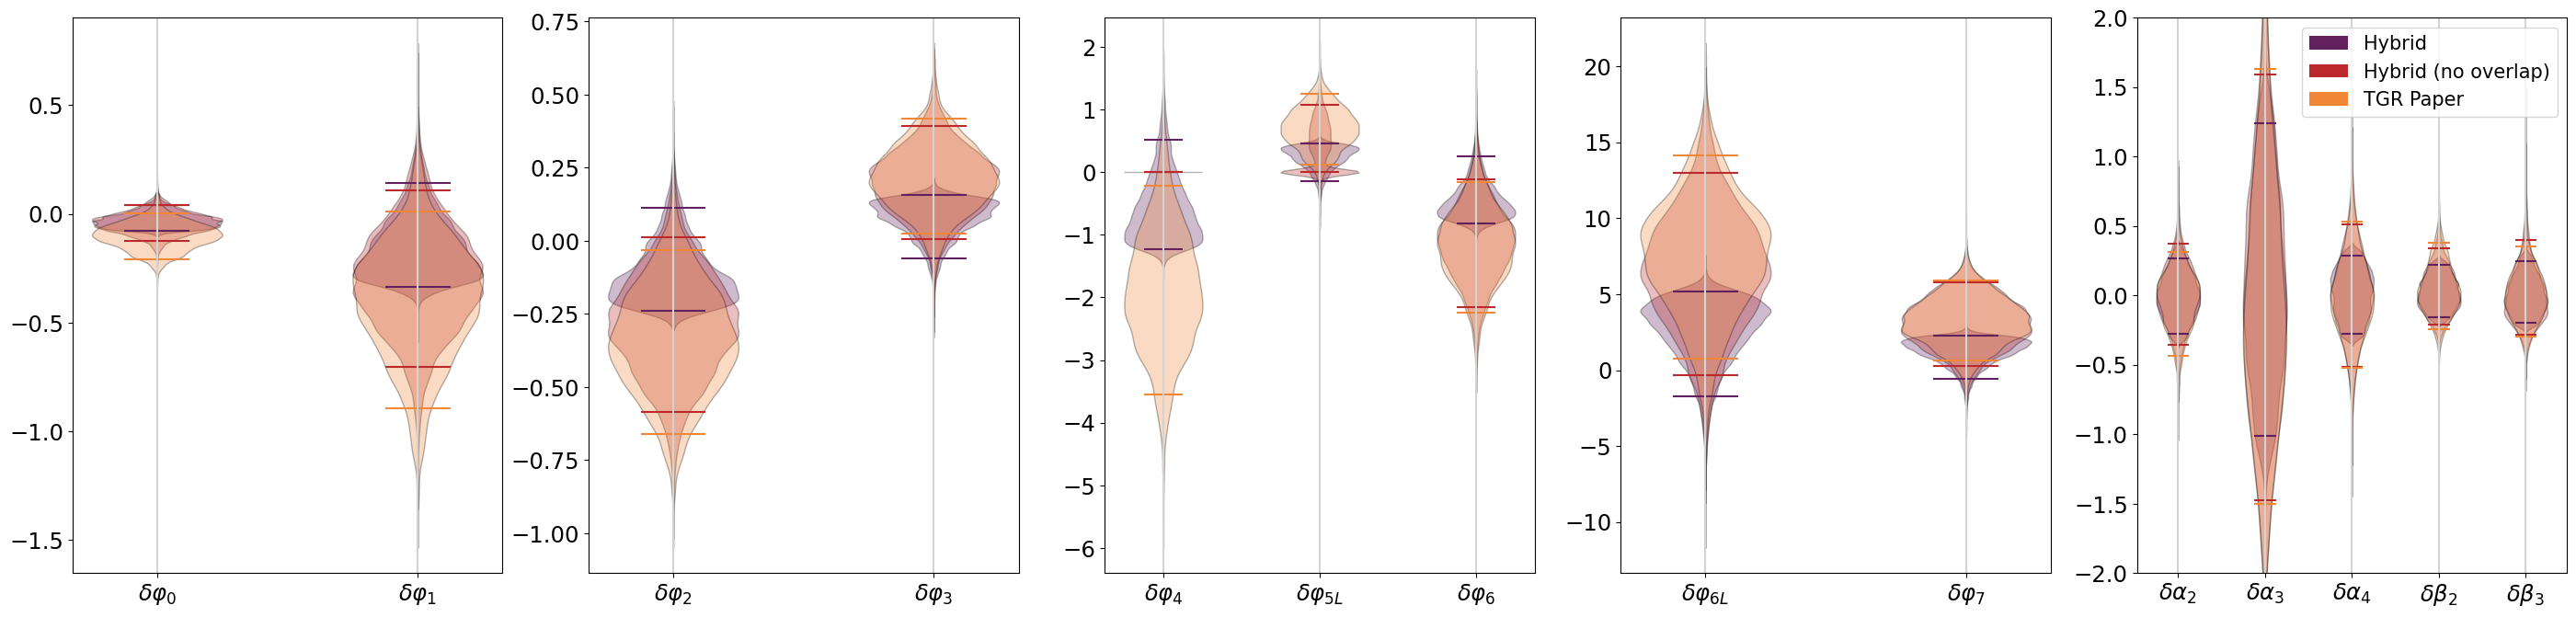

In [21]:
axes2[-1].set_ylim(-2,2)
fig2

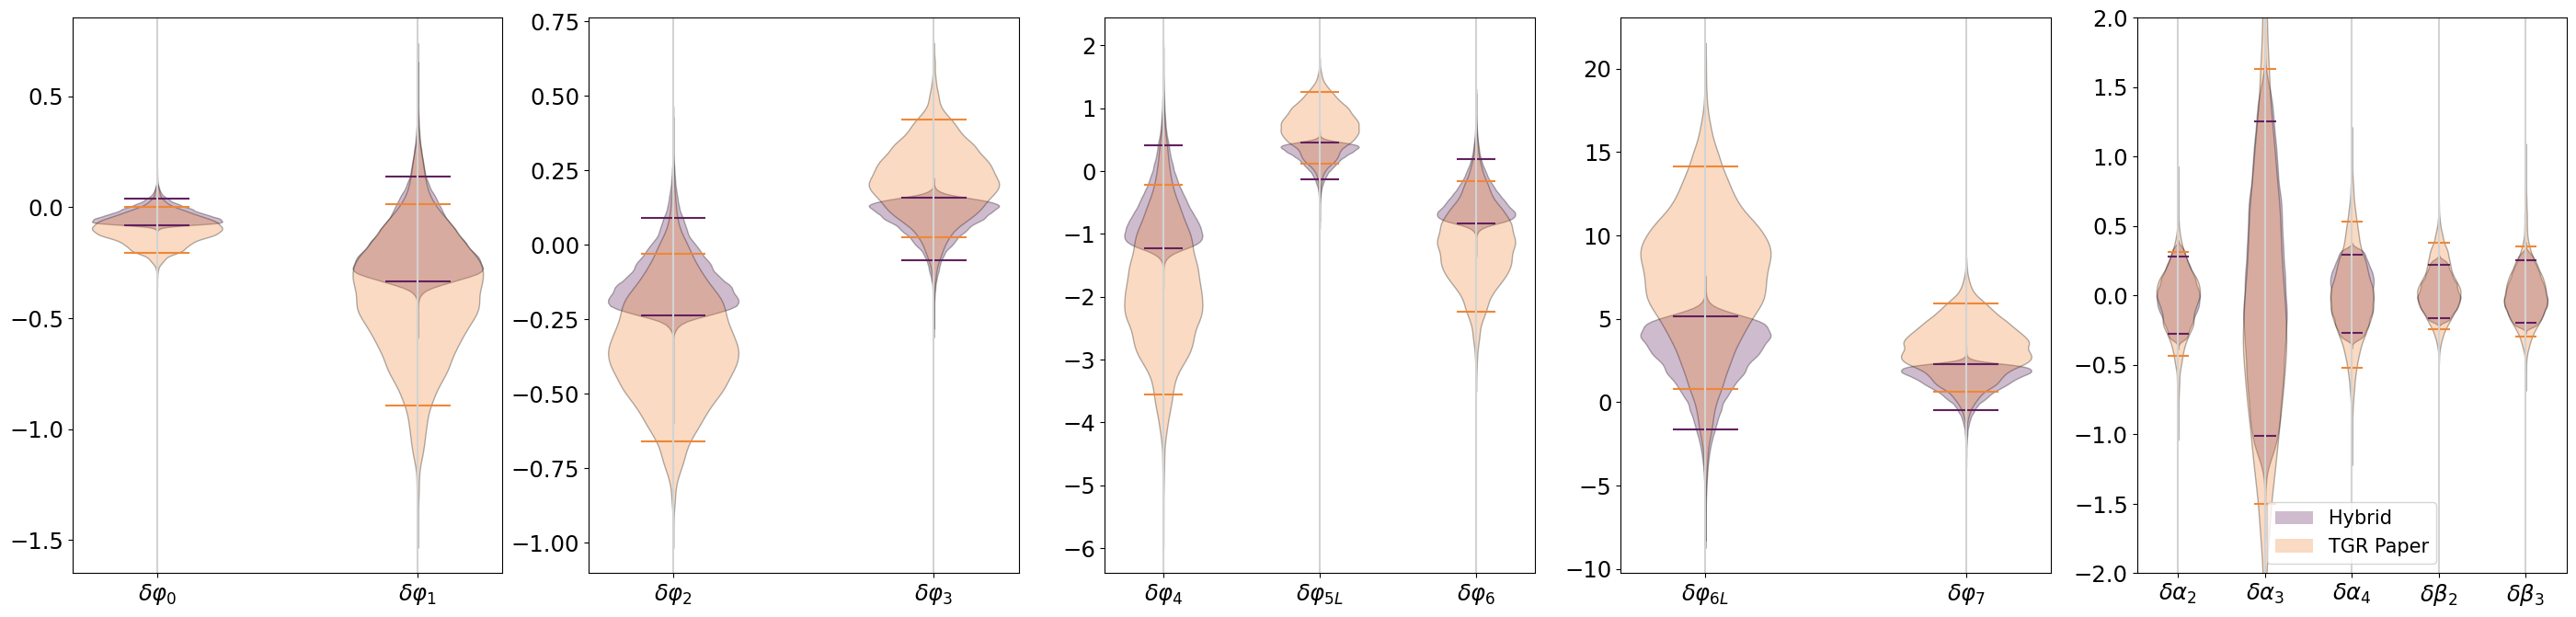

In [78]:
for i,v in enumerate(chunks):
    for j in v:
        axes2[i].axvline(x=j,color="#d3d3d3")
fig2

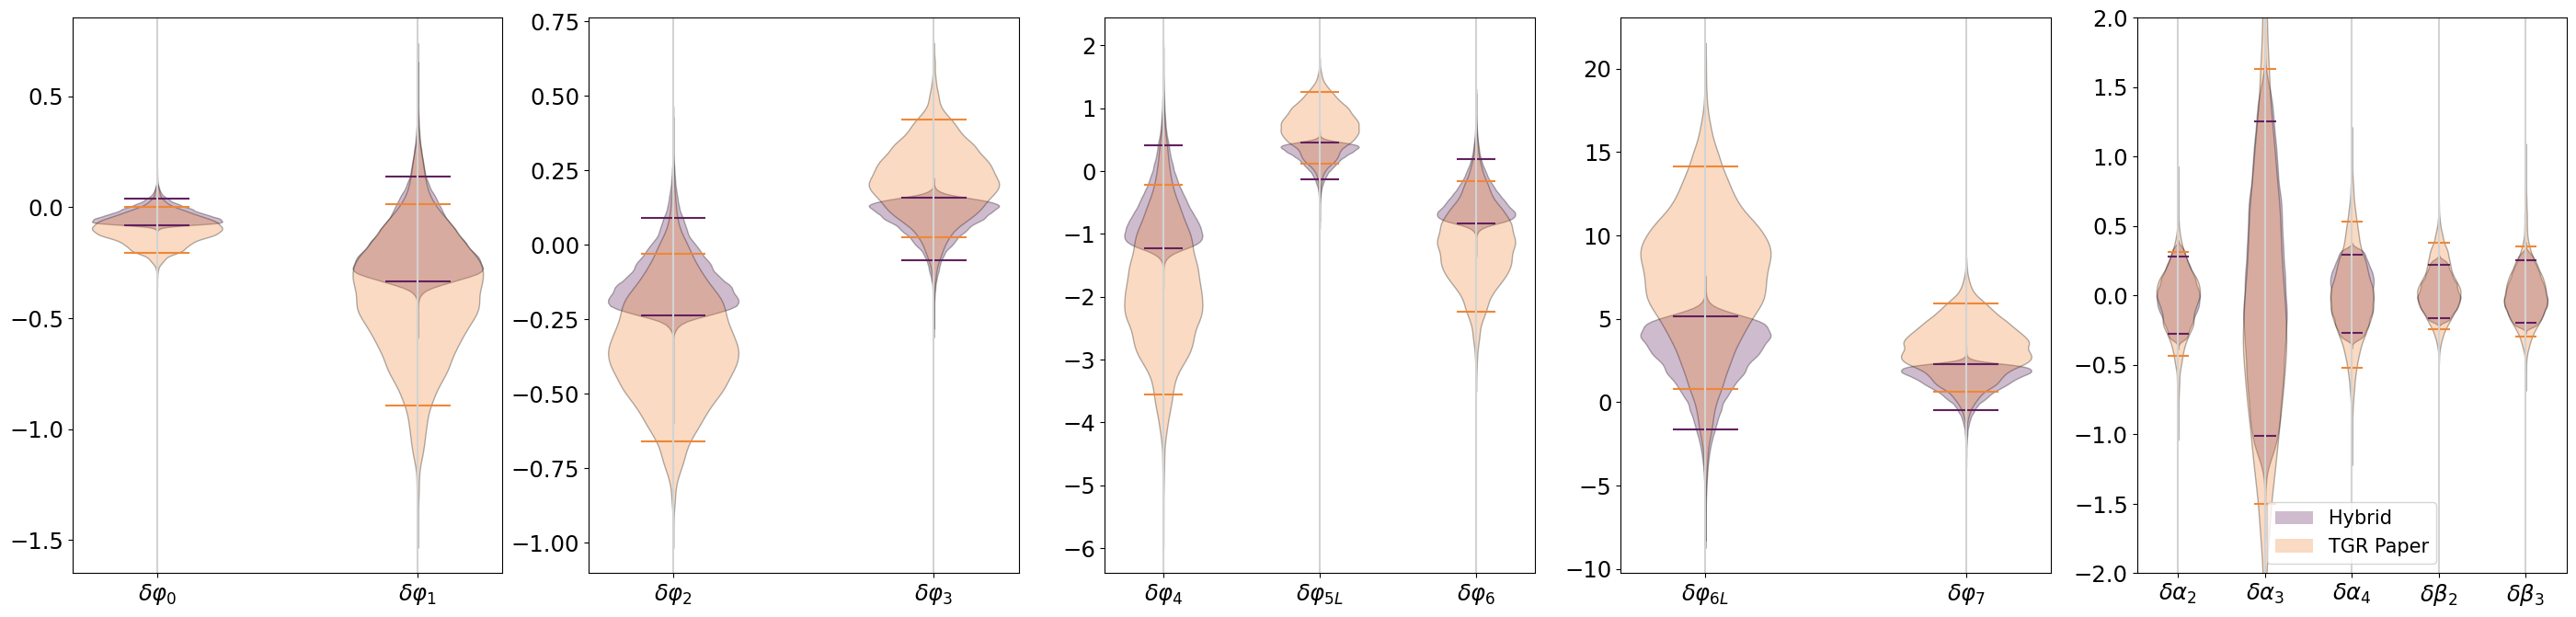

<Figure size 432x288 with 0 Axes>

In [79]:
plt.tight_layout()
fig2

# Another filtering method

In [26]:
import copy
new_plot_dpi_data = copy.deepcopy(plot_dpi_data)
new_plot_dpi_data[ new_plot_dpi_data == 0.0 ] = np.nan

In [33]:
np.count_nonzero(np.isnan(new_plot_dpi_data[2,:]))

22000

In [29]:
plot_dpi_data[2,:] == 0.0

array([False, False, False, ...,  True,  True,  True])

In [ ]:
plot_dpi_data

/home/noah.wolfe/.local/lib/python3.8/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


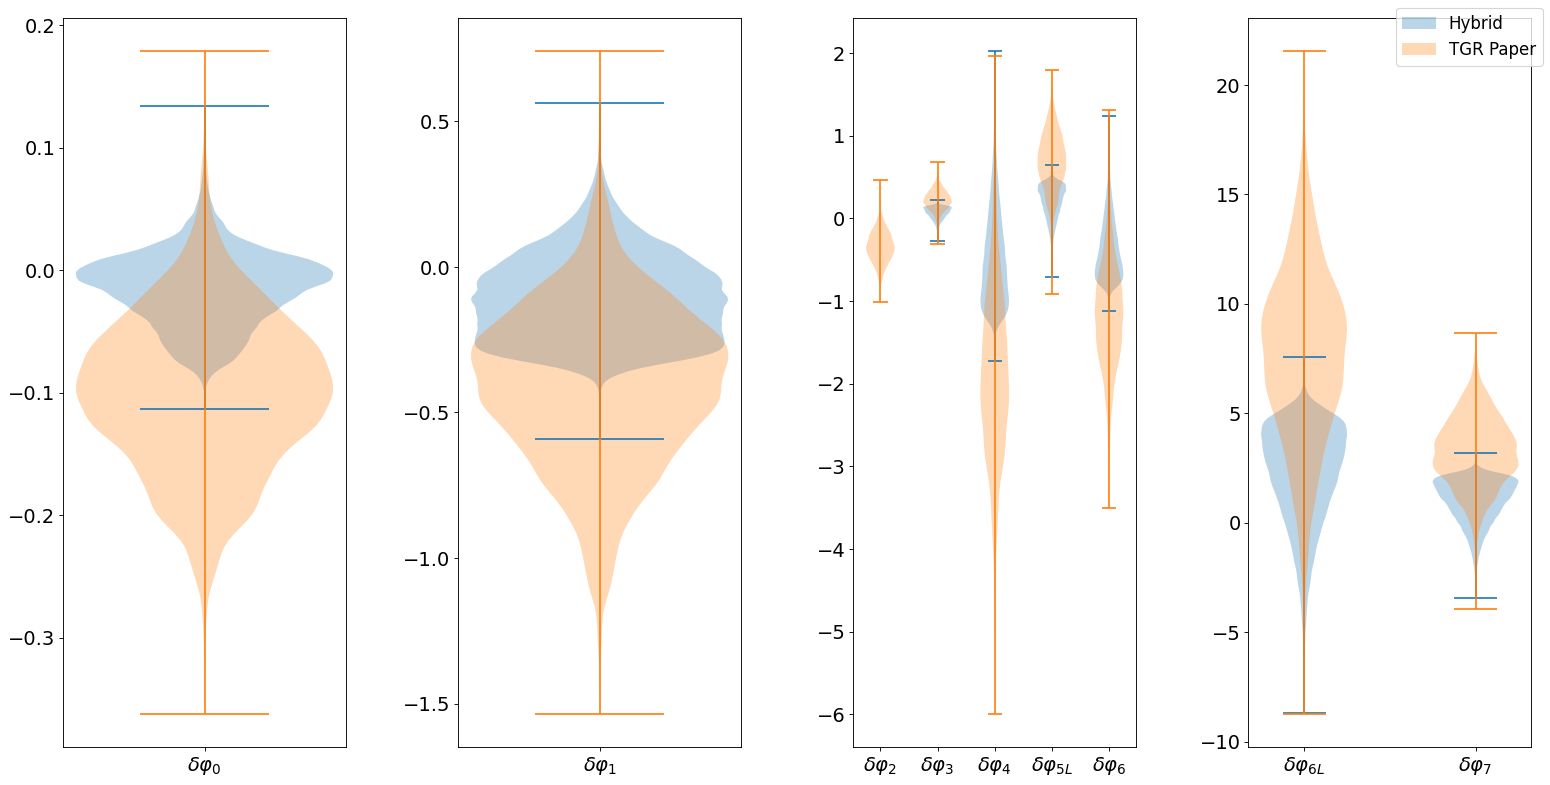

In [27]:
fig3, axes3 = plt.subplots(figsize=(12,8),dpi=80, nrows=1,ncols=4)

hybrid_dists = axes3[0].violinplot( list(new_plot_dpi_data)[0], [0] )
tgr_dists = axes3[0].violinplot( tgr_data[0], [0] )

_ = axes3[1].violinplot( list(new_plot_dpi_data)[1], [1] )
_ = axes3[1].violinplot( tgr_data[1], [1] )

_ = axes3[2].violinplot( list(new_plot_dpi_data[2:7,:]), [2,3,4,5,6] )
_ = axes3[2].violinplot( tgr_data[2:7], [2,3,4,5,6] ) 

_ = axes3[3].violinplot( list(new_plot_dpi_data[7:9,:]), [7,8] )
_ = axes3[3].violinplot( tgr_data[7:9], [7,8] ) 

axes3[0].set_xticks([0])
axes3[0].set_xticklabels([dpi_labels[0]])

axes3[1].set_xticks([1])
axes3[1].set_xticklabels([dpi_labels[1]])

axes3[2].set_xticks([2,3,4,5,6])
axes3[2].set_xticklabels(dpi_labels[2:7])

axes3[3].set_xticks([7,8])
axes3[3].set_xticklabels(dpi_labels[7:9])

for ax in fig3.get_axes():
    ax.tick_params(labelsize=17.5)
    
import matplotlib as mpl

hybrid_color = hybrid_dists["bodies"][0].get_facecolor().flatten()
tgr_color = tgr_dists["bodies"][0].get_facecolor().flatten()

fig3.legend(
    [ mpl.patches.Patch(facecolor=hybrid_color), mpl.patches.Patch(facecolor=tgr_color) ],
    [ "Hybrid", "TGR Paper" ],
    fontsize=15
)

plt.tight_layout()
fig3.set_figwidth(20)
fig3.set_figheight(10)